<a href="https://colab.research.google.com/github/simecek/2022-09-12-deep-learning/blob/main/01_MNIST_Dense_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MNIST dataset

In [16]:
from fastai.vision.all import *
path = untar_data(URLs.MNIST)

In [3]:
len((path / 'training').ls()), len((path / 'training' / '0').ls())

(10, 5923)

## Models

Let us create a data (loader) object and get a random sample.

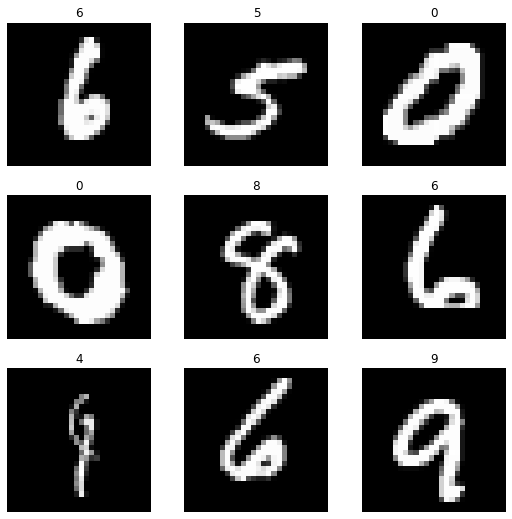

In [4]:
dls = ImageDataLoaders.from_folder(path, train='training', valid='testing')

dls.show_batch()

In [6]:
class StripToBW(Module):

    def forward(self, x):
        # x.size() should be (Z, 3, 28, 28) where Z is the batch-size
        # We want (Z, 28, 28) (we'll just strip out the G/B components and leave the R)
        return x[:,0,:,:]

In [7]:
model = nn.Sequential(
    StripToBW(),   # convert from 3-D to 2-D , stripping color
    nn.Flatten(),  # flatten from 2-D to 1-D
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,10)  # note that output doesn't have a softmax layer.
                      # That gets handled in CrossEntropyLoss function. 
)

We create a model with one hidden layer of size 30. The output of the model is of size 10, because we have 10 categories.

## Training

In [11]:
learn = Learner(dls=dls, model=model, 
                opt_func=SGD, 
                loss_func=CrossEntropyLossFlat(), 
                metrics=accuracy)
learn.summary()

Sequential (Input shape: 64 x 3 x 28 x 28)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 28 x 28        
StripToBW                                                      
____________________________________________________________________________
                     64 x 784            
Flatten                                                        
____________________________________________________________________________
                     64 x 30             
Linear                                    23550      True      
ReLU                                                           
____________________________________________________________________________
                     64 x 10             
Linear                                    310        True      
____________________________________________________________________________

Total params: 23,860
Total trainable params: 23,860
Total non-trainable params: 0

Optimizer use

In [12]:
learn.fit(3, 0.05)

epoch,train_loss,valid_loss,accuracy,time
0,0.301431,0.281022,0.920600,00:11
1,0.275830,0.253379,0.926600,00:11
2,0.239580,0.221844,0.937300,00:11


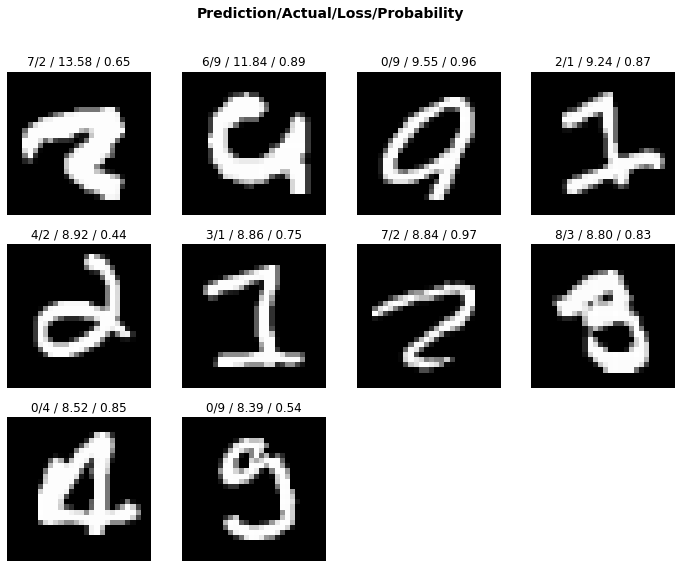

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(10)

This notebook was adapted from [Mnist using fully-connected layers](https://colab.research.google.com/drive/14GwGD4NvWoJ0lVZvvLRgFp04rQoQPGJs?usp=sharing#scrollTo=sSVTnMD4_xvB) notebook.

# CNN

What if we use a simple CNN instead? We will talk more about them after the break.

In [26]:
path = untar_data(URLs.MNIST)

dls = ImageDataLoaders.from_folder(path, train='training', valid='testing')
learn = vision_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.111540,0.053490,0.984200,00:30
